<a href="https://colab.research.google.com/github/tuba39/abc/blob/main/Covid%2019%20tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! git clone https://github.com/imonur/covid19_verisetleri.git

Cloning into 'covid19_verisetleri'...
remote: Enumerating objects: 2320, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 2320 (delta 4), reused 19 (delta 1), pack-reused 2298
Receiving objects: 100% (2320/2320), 1.31 GiB | 37.46 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (2302/2302), done.


In [10]:
import os 
main_dir = './covid19_verisetleri/Data'
egitim_dir =os.path.join(main_dir,'egitim')
test_dir = os.path.join(main_dir,'test')
egitim_covid_dir = os.path.join(egitim_dir,'COVID19')
egitim_normal_dir = os.path.join(egitim_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')


In [4]:
egitim_covid_names = os.listdir(egitim_covid_dir)
print(egitim_covid_names[:10])

egitim_normal_names = os.listdir(egitim_normal_dir)
print(egitim_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(38).jpg', 'COVID19(11).jpg', 'COVID-19 (28).jpeg', 'COVID19(290).jpg', 'COVID19(536).jpg', 'COVID19(421).jpg', 'COVID19(196).jpg', 'COVID19(131).jpg', 'COVID-19 (101).jpg', 'COVID19(30).jpg']
['NORMAL(1317).jpg', 'NORMAL(1263).jpg', 'NORMAL(708).jpg', 'NORMAL(202).jpg', 'NORMAL(743).jpg', 'NORMAL(1074).jpg', 'NORMAL(672).jpg', 'NORMAL(1187).jpg', 'NORMAL(1191).jpg', 'NORMAL(1549).jpg']
['COVID19(289).jpg', 'COVID19(483).jpg', 'COVID-19 (425).jpg', 'COVID19(463).jpg', 'COVID19(285).jpg', 'COVID19(337).jpg', 'COVID19(129).jpg', 'COVID19(399).jpg', 'COVID-19 (642).jpg', 'COVID19(346).jpg']
['NORMAL(393).jpg', 'NORMAL(248).jpg', 'NORMAL(1118).jpg', 'NORMAL(543).jpg', 'NORMAL(161).jpg', 'NORMAL(230).jpg', 'NORMAL(356).jpg', 'NORMAL(561).jpg', 'NORMAL(1001).jpg', 'NORMAL(293).jpg']


In [5]:
print("Egitim verisetindeki covid görüntüleri :",len(egitim_covid_names))
print("Egitim verisetindeki normal görüntüler :",len(egitim_normal_names))
print("Test verisetindeki covid görüntüleri :",len(test_covid_names))
print("Test dataset normal görüntüleri :",len(test_normal_names))
print("Toplam eğitim görüntüleri :",len(egitim_covid_names+egitim_normal_names))
print("Toplam test görüntüleri :",len(test_covid_names+test_normal_names))

Egitim verisetindeki covid görüntüleri : 545
Egitim verisetindeki normal görüntüler : 1266
Test verisetindeki covid görüntüleri : 167
Test dataset normal görüntüleri : 317
Toplam eğitim görüntüleri : 1811
Toplam test görüntüleri : 484


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Sütun ve satır sayısı ayarlanır
nrows = 4
ncols = 4

#Figür boyutu ayarlanır
fig = plt.gcf()
fig.set_size_inches(12,12)


sonraki_covid_pic = [os.path.join(egitim_covid_dir,fname)for fname in egitim_covid_names[0:8]]
sonraki_normal_pic = [os.path.join(egitim_normal_dir,fname)for fname in egitim_normal_names[0:8]]

#Listeyi yazdır
print(sonraki_covid_pic)
print(sonraki_normal_pic)

for i , img_path in enumerate(sonraki_covid_pic+sonraki_normal_pic):
    data = img_path.split('/',6)[6]
    sp =plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(data,fontsize=10)
    plt.imshow(img,cmap='gray')
  
plt.show()

['./covid19_verisetleri/Data/egitim/COVID19/COVID19(38).jpg', './covid19_verisetleri/Data/egitim/COVID19/COVID19(11).jpg', './covid19_verisetleri/Data/egitim/COVID19/COVID-19 (28).jpeg', './covid19_verisetleri/Data/egitim/COVID19/COVID19(290).jpg', './covid19_verisetleri/Data/egitim/COVID19/COVID19(536).jpg', './covid19_verisetleri/Data/egitim/COVID19/COVID19(421).jpg', './covid19_verisetleri/Data/egitim/COVID19/COVID19(196).jpg', './covid19_verisetleri/Data/egitim/COVID19/COVID19(131).jpg']
['./covid19_verisetleri/Data/egitim/NORMAL/NORMAL(1317).jpg', './covid19_verisetleri/Data/egitim/NORMAL/NORMAL(1263).jpg', './covid19_verisetleri/Data/egitim/NORMAL/NORMAL(708).jpg', './covid19_verisetleri/Data/egitim/NORMAL/NORMAL(202).jpg', './covid19_verisetleri/Data/egitim/NORMAL/NORMAL(743).jpg', './covid19_verisetleri/Data/egitim/NORMAL/NORMAL(1074).jpg', './covid19_verisetleri/Data/egitim/NORMAL/NORMAL(672).jpg', './covid19_verisetleri/Data/egitim/NORMAL/NORMAL(1187).jpg']


IndexError: ignored

<Figure size 864x864 with 0 Axes>

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Eğitim verilerimiz için jeneratör
egitim_veri_jeneratoru = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)         
                      

# Doğrulama verilerimiz için jeneratör
dogrulama_veri_jeneratoru = ImageDataGenerator(rescale = 1./255)


# Test verilerimiz için jeneratör
test_veri_jeneratoru = ImageDataGenerator(rescale = 1./255)

egitim_jeneratoru = egitim_veri_jeneratoru.flow_from_directory(egitim_dir ,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

dogrulama_jeneratoru = egitim_veri_jeneratoru.flow_from_directory(egitim_dir ,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_jeneratoru = test_veri_jeneratoru.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [12]:
egitim_jeneratoru.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [13]:
egitim_jeneratoru.image_shape

(150, 150, 3)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [15]:
model = Sequential()

In [16]:
# evrişim katmanı eklenir. Filtreler, filtrelerin boyutları, aktivasyon fonksiyonu belirlenir

model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))

In [17]:
# pooling katmanı eklenir
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
# Dropout katmanı eklenir
model.add(Dropout(0.5))

In [19]:
# Başka bir evrişim katmanı daha eklenir
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

In [20]:
# pooling katmanı eklenir
model.add(MaxPooling2D(pool_size=(2,2)))

In [21]:
# Dropout katmanı eklenir
model.add(Dropout(0.5))

In [22]:
# Resmi 1 boyutlu diziye düzleştiririz
model.add(Flatten())

In [23]:
# Düğüm sayısı ve aktivasyonu belli olan bir katman daha eklenir.
model.add(Dense(256,activation='relu'))

In [27]:
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [28]:
# Model derlemesi yapılır

from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate = 0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
# Modeli Eğitiyoruz
history = model.fit(egitim_jeneratoru,
                              epochs=3,
                              validation_data = dogrulama_jeneratoru,
                              validation_steps = 10)

Epoch 1/3
46/46 [==============================] - 120s 3s/step - loss: 0.8561 - accuracy: 0.8192 - val_loss: 0.3447 - val_accuracy: 0.9438
Epoch 2/3
46/46 [==============================] - 112s 2s/step - loss: 0.2228 - accuracy: 0.9137 - val_loss: 0.3009 - val_accuracy: 0.9500
Epoch 3/3
46/46 [==============================] - 114s 2s/step - loss: 0.1773 - accuracy: 0.9386 - val_loss: 0.1944 - val_accuracy: 0.9531


In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

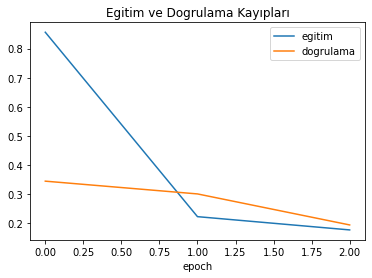

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['egitim','dogrulama'])
plt.title('Egitim ve Dogrulama Kayıpları')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

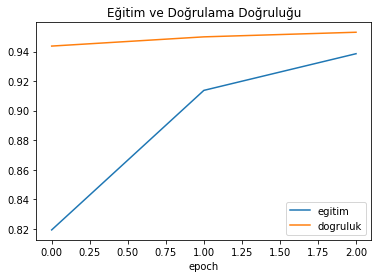

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['egitim','dogruluk'])
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('epoch')

In [33]:
test_loss , test_acc = model.evaluate(test_jeneratoru)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

16/16 [==============================] - 16s 952ms/step - loss: 0.1854 - accuracy: 0.9545
test acc :0.9545454382896423 test loss:0.18543563783168793


In [34]:
import matplotlib.pyplot as plt

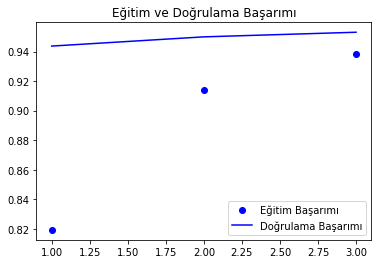

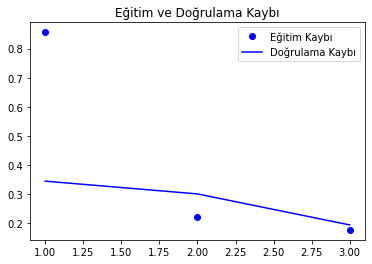

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Eğitim Başarımı')
plt.plot(epochs, val_acc, 'b', label='Doğrulama Başarımı')
plt.title('Eğitim ve Doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()

plt.show()

In [36]:
# Bir hastanın COVID19'dan etkilenip etkilenmediğini tahmin etmek için modelinizi yerel bilgisayarınızdan bazı görüntülerle test edeceğiz. 
# Bunun için ilk önce gerekli kütüphaneleri yüklüyoruz. 

import numpy as np
from google.colab import files
from keras.preprocessing import image

In [37]:
import keras
import tensorflow as tf
import keras.utils as image

In [40]:
# Bilgisayardan testleri yapılacak örnek görüntüler seçilir.
uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid19')
  else:
    print('Normal')

Saving NORMAL(23).jpg to NORMAL(23).jpg
/content/NORMAL(23).jpg
1/1 [==============================] - 0s 39ms/step
NORMAL(23).jpg
Normal


In [43]:
# Google Colab üzerinden dosyamızı indiriyoruz.

from keras.models import load_model

model = load_model('my_model.h5')
model.summary()

OSError: ignored